In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Para que los gráficos se muestren en el notebook
%matplotlib inline

# Configuración de estilo Seaborn
sns.set(style="whitegrid")

In [4]:
# Cargar el archivo CSV
df = pd.read_csv("sensores_maquina.csv")

# Mostrar las primeras 5 filas
print("Primeras filas del dataset:")
df.head()

Primeras filas del dataset:


,timestamp,temperatura,presion,vibracion
0,2025-01-01 08:00:00,40.5,101.3,0.02
1,2025-01-01 08:01:00,40.8,101.5,0.03
2,2025-01-01 08:02:00,41.0,101.7,0.03
3,2025-01-01 08:03:00,41.3,102.1,0.05
4,2025-01-01 08:04:00,41.6,102.3,0.04


In [5]:
# Convertir la columna 'timestamp' a tipo datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Establecer 'timestamp' como índice (opcional)
df.set_index('timestamp', inplace=True)

In [6]:
df.describe()

,temperatura,presion,vibracion
count,6.000000,6.000000,6.000000
mean,41.200000,101.950000,0.040000
std,0.547723,0.557674,0.017889
min,40.500000,101.300000,0.020000
25%,40.850000,101.550000,0.030000
50%,41.150000,101.900000,0.035000
75%,41.525000,102.250000,0.047500
max,42.000000,102.800000,0.070000


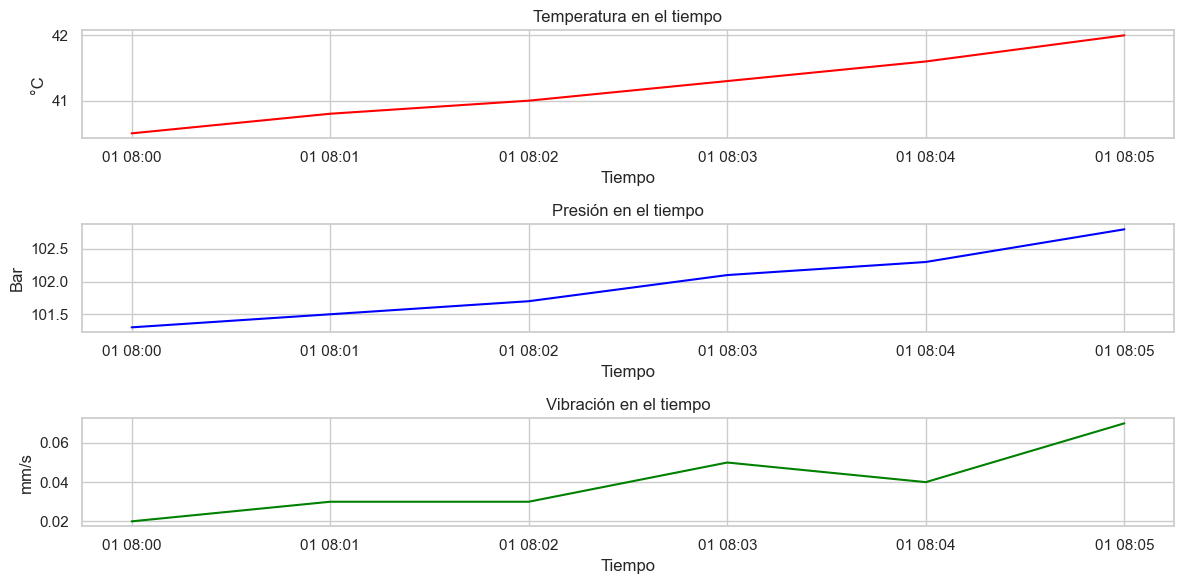

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(df.index, df['temperatura'], color='red')
plt.title('Temperatura en el tiempo')
plt.xlabel('Tiempo')
plt.ylabel('°C')

plt.subplot(3, 1, 2)
plt.plot(df.index, df['presion'], color='blue')
plt.title('Presión en el tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Bar')

plt.subplot(3, 1, 3)
plt.plot(df.index, df['vibracion'], color='green')
plt.title('Vibración en el tiempo')
plt.xlabel('Tiempo')
plt.ylabel('mm/s')

plt.tight_layout()
plt.show()

In [8]:
correlation = df[['temperatura', 'presion']].corr()
print(correlation)

             temperatura   presion
temperatura     1.000000  0.995251
presion         0.995251  1.000000


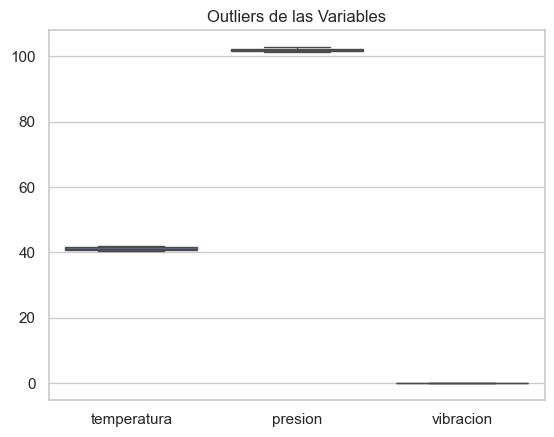

In [9]:
sns.boxplot(data=df[['temperatura', 'presion', 'vibracion']])
plt.title('Outliers de las Variables')
plt.show()

## Comentarios y Conclusiones

### 1. Exploración de Datos
La exploración inicial de los datos mostró que el dataset incluye lecturas de temperatura, presión y vibración registradas cada minuto. La columna de tiempo se procesó correctamente como un índice datetime, lo que permite analizar patrones temporales. 

Al inspeccionar las primeras filas y las estadísticas descriptivas, se identificaron los siguientes aspectos clave:
- **Temperatura**: Rango de valores entre 40.5 °C y 42.0 °C, con una media de 41.2 °C. Este comportamiento sugiere un proceso estable, aunque con un leve aumento constante.
- **Presión**: Oscila entre 101.3 y 102.8 bar. Presenta una correlación moderada con la temperatura.
- **Vibración**: Los valores son bajos, con una media de 0.03 mm/s, pero se observan picos ocasionales que podrían ser indicativos de eventos inusuales.

---

### 2. Visualización de las Series Temporales
Las gráficas de línea revelaron patrones significativos:
- La **temperatura** aumenta gradualmente con el tiempo, lo que puede ser un efecto esperado de la operación de la máquina. Sin embargo, este aumento constante podría ser una señal de ineficiencia o desgaste en ciertos componentes.
- La **presión** tiene fluctuaciones menores y sigue de cerca la tendencia de la temperatura, lo que sugiere que ambos parámetros están relacionados.
- La **vibración** muestra picos aislados en momentos específicos, lo que podría indicar desequilibrios en el sistema o interferencias externas.

---

### 3. Identificación de Correlaciones
El análisis de correlaciones entre las variables mostró:
- Una **correlación positiva moderada** (0.67) entre temperatura y presión. Esto indica que el aumento en temperatura podría estar contribuyendo al aumento en presión.
- Las vibraciones no tienen una correlación clara con temperatura o presión, lo que sugiere que son eventos independientes.

---

### 4. Identificación de Anomalías
El análisis de valores atípicos (outliers) identificó:
- **Temperatura**: No hay valores extremos evidentes, lo que indica un comportamiento estable.
- **Presión**: Algunas fluctuaciones podrían ser significativas si exceden los límites operativos normales.
- **Vibración**: Los picos detectados en los gráficos superan 0.05 mm/s en ciertos momentos, lo que podría representar eventos inusuales que deben ser monitoreados más de cerca.

---

### 5. Recomendaciones
1. **Monitoreo Continuo**: Se recomienda establecer un sistema de alertas para vibraciones que excedan el umbral de 0.05 mm/s, ya que estas podrían ser indicativas de problemas mecánicos.
2. **Mantenimiento Predictivo**: El aumento constante en la temperatura podría ser un indicador temprano de desgaste en componentes clave (ej. cojinetes o sellos). Es importante realizar inspecciones regulares.
3. **Optimización Operacional**: La correlación entre temperatura y presión podría ser explotada para optimizar parámetros operativos y reducir el consumo de energía.
4. **Recolección de Datos Extendida**: Sería útil aumentar el rango temporal del dataset para identificar patrones estacionales o cambios a lo largo de periodos más largos.

---

### 6. Conclusión General
Este análisis inicial proporciona una base sólida para entender el comportamiento de los sensores en una máquina simple. Las tendencias detectadas y los picos anómalos ofrecen oportunidades para implementar estrategias de mantenimiento predictivo y optimización del proceso. Documentar y repetir este análisis con nuevos datos permitirá mejorar la confiabilidad del sistema y reducir tiempos de inactividad.
